In [1]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

[[0 1]
 [1 0]]
[[ 1  0]
 [ 0 -1]]
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


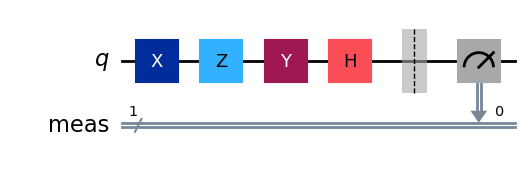

In [9]:
qc = QuantumCircuit(1) # create a quantum circuit with 3 qubits
# create the x gate
qc.x(0)
shots = 1024 # number of shots for the simulation
# matrix representation of the x gate
print(np.array([[0, 1], [1, 0]]))
# create the z gate
qc.z(0)
# matrix representation of the z gate
print(np.array([[1, 0], [0, -1]]))
# create the y gate
qc.y(0)
# matrix representation of the y gate
print(np.array([[0, -1j], [1j, 0]]))
# create the h gate
qc.h(0)
# matrix representation of the h gate
print(np.array([[1, 1], [1, -1]]) / np.sqrt(2))
# create the s  gate
#qc.s(0)
qc.measure_all()
qc.draw('mpl')



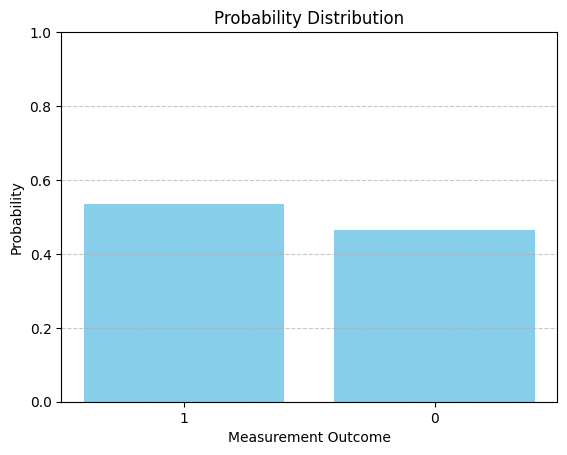

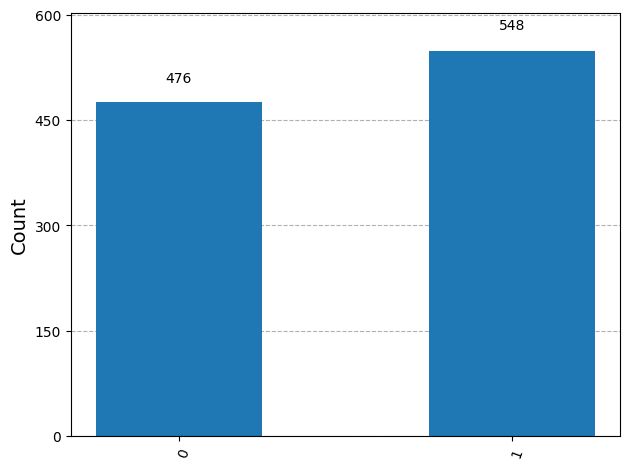

In [10]:
backend = Aer.get_backend('qasm_simulator')  # Use the Aer simulator backend
# Run the circuit on the simulator
job = backend.run(qc, shots=shots)
job_result = job.result()
# Get the counts
counts = job_result.get_counts()

# Convert counts to probabilities
probabilities = {state: count / shots for state, count in counts.items()}

# Plot the probability distribution
plt.bar(probabilities.keys(), probabilities.values(), color='skyblue')
plt.xlabel('Measurement Outcome')
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Plot the histogram of counts
plot_histogram(counts)